In [1]:
import json
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
with open("index.json", "r") as f:
    index = json.load(f)

In [3]:
embeddings = []
names = []
source_code = []
paths = []

for path, data in index.items():
    for name, _data in data.items():
        code = _data["source_code"]
        embedding = _data["embedding"]
        names.append(name)
        embeddings.append(embedding)
        paths.append(path)
        source_code.append(code)

In [4]:
ar_embeddings = np.array(embeddings)

In [5]:
tsne = TSNE(
    n_components=2,
    init="pca",
    random_state=0,
    perplexity=15,
    learning_rate="auto",
    n_iter=4000,
)
Y = tsne.fit_transform(ar_embeddings)

/Users/marti/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [6]:
uniq_paths = list(set(paths))
colors = cm.get_cmap('viridis', len(uniq_paths))

colors = dict(zip(uniq_paths, list(colors(range(len(uniq_paths))))))

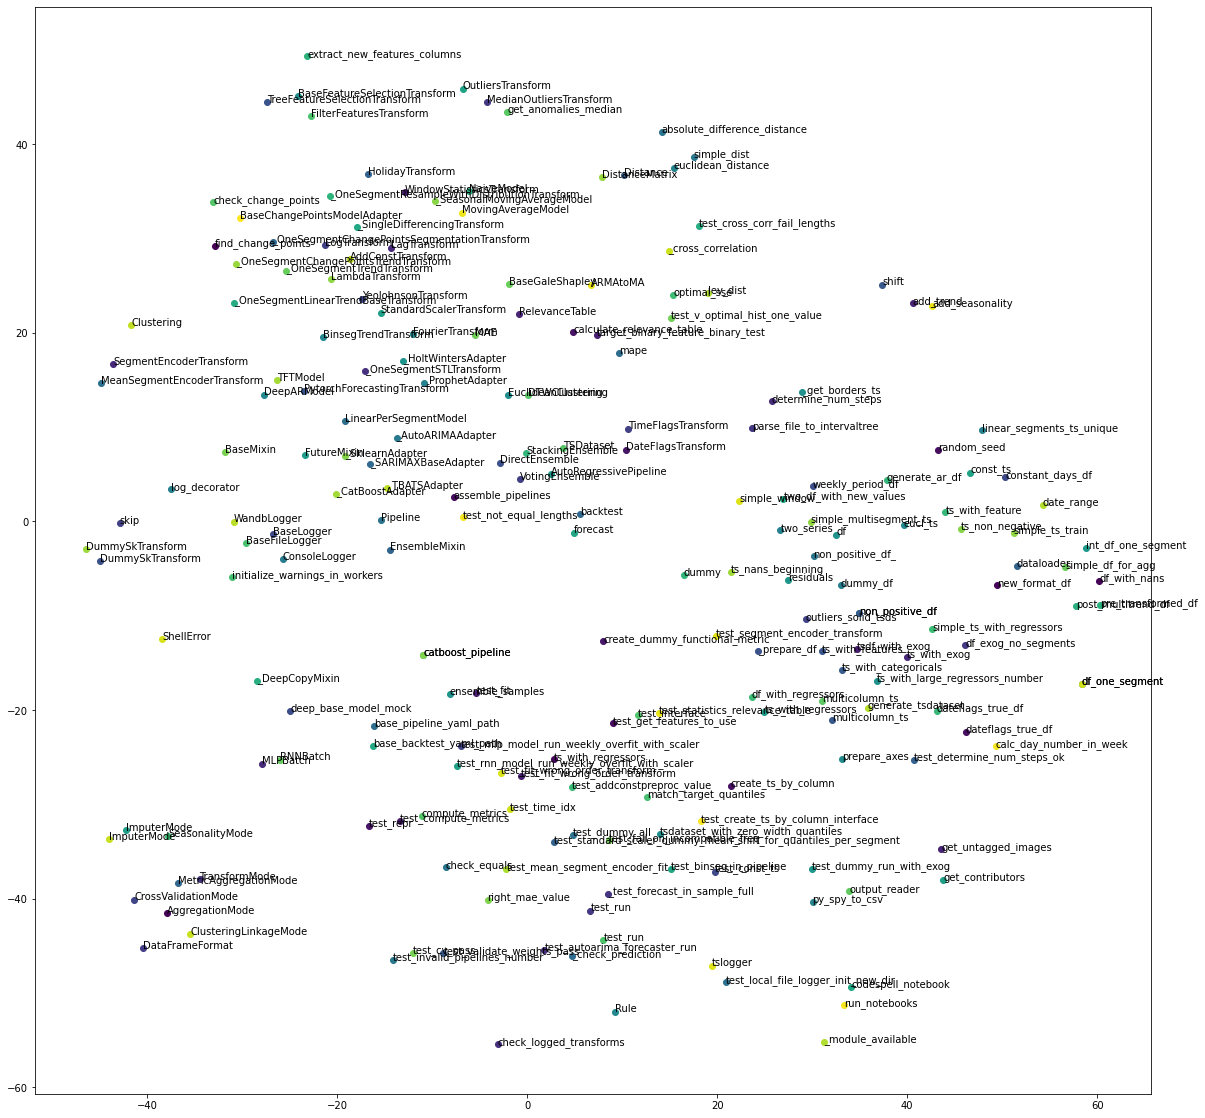

In [7]:
fig, ax = plt.subplots(figsize=(20, 20))
for i in range(len(Y)):
    ax.scatter(Y[i, 0], Y[i, 1], color=colors[paths[i]])

for i, txt in enumerate(names):
    ax.annotate(txt, (Y[i, 0], Y[i, 1]))